<a href="https://colab.research.google.com/github/BomfimThiago/Portfolio-Data-Science/blob/master/enem2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das Notas do Enem 2016!
Neste notebook vamos analisar as notas do enem de 2016 e construir um modelo que nos diga,com precisão, quais serão as notas de matemática dos alunos.

Construiremos nosso modelo no devido tempo mas antes vamos aproveitar esse dataset e responder algumas perguntas que achei interessante e tentar extrair algumas informações do nosso dataset.

<h5><b> Perguntas:<h5></b>
<ul>
  <li> Os alunos de escola Federal ou Privada tem uma média maior do que os alunos de escola municipal ou estadual?</li>
  <li> Os alunos que trabalham teriam menor desempenho  no enem, visto que provavelmente teriam menos tempo para estudar?
  <li>Quem está no terceiro ano do ensino médio se sai melhor no enem do que quem já concluiu o ensino médio?teoricamente os alunos do 3° ano estariam com a matéria mais fresca.
  <li> Qual a região do Brasil com maior média no enem?

  <li>Será que os candidatos casados tiveram menor aproveitamento que os solteiros?teoricamente os casados tem maiores tarefas diárias e isso poderia limitar o tempo de estudo.
</ul>

Bom, para responder essas perguntas e criar nosso modelo vamos seguir essas etapas:
<ol>
  <li>Tratamento dos Dados</li>
  <li>Análise dos dados(Responderemos as perguntas)</li>
  <li>Criação e treinamento do modelo</li>
  <li>Predição das notas de matemática dos alunos e avaliação da perfomance do modelo.</li>
</ol>


# **1- Tratamento dos Dados**
Para começar vamos importar os dados e dar uma olhada em suas características


In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

base = pd.read_csv("enem_train.csv").drop(columns=['Unnamed: 0'])

In [0]:
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
base.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [0]:
base.shape

(13730, 166)

Como podemos ver temos um dataset extenso com 166 colunas, para agilizar nosso entendimento vamos selecionar apenas aquelas que nos interessam.se você desejar, vou deixar disponível na área de arquivos o dicionário de todas essas colunas para você entender quais podem interessar para a sua análise .

In [0]:
atributos_selecionados = ['NU_IDADE','TP_ST_CONCLUSAO','TP_SEXO','TP_DEPENDENCIA_ADM_ESC','SG_UF_PROVA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_REDACAO','TP_ESTADO_CIVIL','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','Q026']

In [0]:
atributos_selecionados


['NU_IDADE',
 'TP_ST_CONCLUSAO',
 'TP_SEXO',
 'TP_DEPENDENCIA_ADM_ESC',
 'SG_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_MT',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_REDACAO',
 'TP_ESTADO_CIVIL',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'Q026']

In [0]:
base = base[atributos_selecionados]

In [0]:
base.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_SEXO,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO,TP_ESTADO_CIVIL,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q026
0,24,1,M,NaN,RS,1,1,1,1,399.4,495.4,581.2,436.3,520.0,0.0,120.0,120.0,120.0,80.0,80.0,C
1,17,2,F,2.0,CE,1,1,1,1,459.8,544.1,599.0,474.5,580.0,0.0,140.0,120.0,120.0,120.0,80.0,A
2,21,3,F,NaN,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,A
3,25,1,F,NaN,RJ,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,C
4,28,1,M,NaN,AM,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,B


Descrevendo os atributos selecionados:
<ul>
  <li>NU_IDADE : Idade do candidato.</li> 
  <li>TP_ST_CONCLUSAO:Indica se o candidato está no terceiro ano do ensino médio,se ele já terminou o ensino médio, ou se vai terminá-lo após a prova do enem de 2016.</li>
  <li>TP_SEXO:Sexo do candidato.</li>
  <li>TP_DEPENDENCIA_ADM_ESC: Indica se a escola que o aluno estudou o ensino médio é Federal, Estadual,Municipal ou Privada.
  <li>SG_UF_PROVA: UF do Estado onde o candidato realizou a prova.
  <li>TP_PRESENCA: Indica se o candidato compareceu, faltou ou teve a prova eliminada em cada uma das disciplinas cobradas no enem: Ciências Naturais(CN), Ciências Humanas(CH), Códigos e Linguagens(LC) e Matématica(MT).</li>
  <li>NU_NOTA: Indica a nota do candidato nas disciplinas cobradas. A NU_NOTA_COMP é uma nota avaliada em 5 aspectos que formam a nota final da redação daquele candidato.</li>
  <li>TP_ESTADO_CIVIL: Indica se o candidato é solteiro,casado,divorciado ou viúvo.
  <li>Q026: Indica se o candidato nunca trabalhou, se já trabalhou mas está desempregado ou se trabalha atualmente.


Agora que selecionamos os dados que nos interessam vamos fazer alguns pequenos tratamentos. Para começar vamos ver qual a quantidade de dados faltantes em cada atributo do nosso dataset.

In [0]:
base.isnull().sum()

NU_IDADE                     0
TP_ST_CONCLUSAO              0
TP_SEXO                      0
TP_DEPENDENCIA_ADM_ESC    9448
SG_UF_PROVA                  0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_MT                3597
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_CN                3389
NU_NOTA_REDACAO           3597
TP_ESTADO_CIVIL            528
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
Q026                         0
dtype: int64

Temos muitos valores faltantes.Muitos desses valores são as notas do candidato,as quais são extramamente importantes para nossa análise.
Para nos ajudar, vamos usar o nosso atributo TP_PRESENCA. Se TP_PRESENCA for igual a 0 significa que o candidato faltou a prova, se for igual 1, ele compareceu e se igual a 2 ele teve a prova eliminada. Se o aluno faltou ou teve a prova eliminada, ele terá a nota das suas provas zerada e podemos seguramente eliminar os dados desses candidatos do nosso dataset. 

In [0]:
indices = base.index[(base.TP_PRESENCA_LC != 1) | (base.TP_PRESENCA_MT != 1)  | (base.TP_PRESENCA_CH != 1)  | (base.TP_PRESENCA_CN != 1) ]

In [0]:
base.drop(base.index[indices], axis=0, inplace=True)

In [0]:
base.isnull().sum()

NU_IDADE                     0
TP_ST_CONCLUSAO              0
TP_SEXO                      0
TP_DEPENDENCIA_ADM_ESC    6469
SG_UF_PROVA                  0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_MT                   0
NU_NOTA_CH                   0
NU_NOTA_LC                   0
NU_NOTA_CN                   0
NU_NOTA_REDACAO              0
TP_ESTADO_CIVIL            316
NU_NOTA_COMP1                0
NU_NOTA_COMP2                0
NU_NOTA_COMP3                0
NU_NOTA_COMP4                0
NU_NOTA_COMP5                0
Q026                         0
dtype: int64

Para o nosso alívio, assim que tiramos os candidatos que faltaram e que foram eliminados da prova, conseguimos retirar todos os dados faltantes nas notas no nosso dataset.
Para tratar agora os dados faltantes no TP_ESTADO_CIVIL vamos utilizar o sexo e a idade dos nosso candidatos.
o código do TP_ESTADO_CIVIL é o seguinte:
0: Solteiro,
1: Casado,
2: Divorciado,
3: Viúvo.

In [0]:
base.groupby(['TP_ESTADO_CIVIL','TP_SEXO'])['NU_IDADE'].mean()

TP_ESTADO_CIVIL  TP_SEXO
0.0              F          19.429419
                 M          19.577022
1.0              F          30.705036
                 M          33.855204
2.0              F          37.115385
                 M          36.391304
3.0              F          42.571429
                 M          39.000000
Name: NU_IDADE, dtype: float64

Acima,temos a média da idade por sexo e por estado civil.Vemos que uma mulher solteira com uma média de 30 anos tende a ser casada no nosso dataset, assim como um homem de 37 anos tende a ser viúvo no nosso dataset. Vamos usar essa lógica para preencher nossos dados faltantes de TP_ESTADO_CIVIL.

In [0]:
def preenche_estado_civil(estadocivil_sexo_idade):
    estado_civil = estadocivil_sexo_idade[0]
    sexo = estadocivil_sexo_idade[1]
    idade = estadocivil_sexo_idade[2]
    if pd.isnull(estado_civil):
        if sexo == 'F':
            if idade < 30:
                return 0
            elif 30 <idade < 37:
                return 1
            elif 37 < idade < 42:
                return 2
            else:
                return 3
        else:
            if idade < 30:
                return 0
            elif 30 < idade < 33:
                return 1 
            elif 33 < idade < 39:
                return 2
            else:
                return 3
    else:
        return estado_civil

In [0]:
base['TP_ESTADO_CIVIL'] = base[['TP_ESTADO_CIVIL','TP_SEXO','NU_IDADE']].apply(preenche_estado_civil, axis=1)

No código acima criamos uma função que avalia a idade e o sexo do candidato e aplica um valor condizente com a nossa lógica ao seu estado civil se este for nulo. depois aplicamos essa função a cada linha do nosso dataset.

In [0]:
base.isnull().sum()

NU_IDADE                     0
TP_ST_CONCLUSAO              0
TP_SEXO                      0
TP_DEPENDENCIA_ADM_ESC    2836
SG_UF_PROVA                  0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_MT                   0
NU_NOTA_CH                   0
NU_NOTA_LC                   0
NU_NOTA_CN                   0
NU_NOTA_REDACAO              0
TP_ESTADO_CIVIL              0
NU_NOTA_COMP1                0
NU_NOTA_COMP2                0
NU_NOTA_COMP3                0
NU_NOTA_COMP4                0
NU_NOTA_COMP5                0
Q026                         0
dtype: int64

Não temos mais dados faltantes no nosso TP_ESTADO_CIVIL.
Para finalizar vamos tratar o TP_DEPENDENCIA_ADM_ESC.Esse é um atributo bem mais difícil de entender qual lógica usar no preenchimento.Uma abordagem seria preencher os dados faltantes com a média da nota dos candidatos por dependência. ex. se a média da nota dos candidatos que estudaram na escola federal for x e a média da nota dos candidatos que estudaram numa escola privada for y, podemos verificar a média da nota do candidato e aplicar a ele um tipo de escola baseado na sua média. 

Claro que essa abordagem não é 100% efetiva mas nos ajudará a preencher os dados faltantes e fazer uma análise do nosso dataset.

Para utilizar nossa abordagem precisamos primeiro criar no nosso dataset um atributo chamado Nota_Final que nos trará a nota final do candidato, calculando sua nota em cada prova e levando em consideração seus respectivos pesos.

In [0]:
def nota_final(df):
    df['Nota_Final'] = (df['NU_NOTA_MT'] * 3) + (df['NU_NOTA_LC'] * 1.5) + (df['NU_NOTA_CN'] * 1) + (df['NU_NOTA_CH'] * 2) + (df['NU_NOTA_REDACAO'] * 3) /(1.5+3+3+1+2)

In [0]:
nota_final(base)

Mais uma vez criamos uma função que cria nosso atributo Nota_Final e atribuímos essa função ao nosso dataset.Abaixo podemos ver o atributo criado com suas respectivas notas.

In [0]:
base.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_SEXO,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO,TP_ESTADO_CIVIL,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q026,Nota_Final
0,24,1,M,NaN,RS,1,1,1,1,399.4,495.4,581.2,436.3,520.0,0.0,120.0,120.0,120.0,80.0,80.0,C,3645.671429
1,17,2,F,2.0,CE,1,1,1,1,459.8,544.1,599.0,474.5,580.0,0.0,140.0,120.0,120.0,120.0,80.0,A,4006.314286
5,18,1,F,NaN,BA,1,1,1,1,364.5,583.2,410.9,439.7,620.0,0.0,120.0,120.0,120.0,160.0,100.0,A,3493.092857
6,18,2,F,2.0,MT,1,1,1,1,529.2,604.2,484.5,420.1,560.0,0.0,100.0,120.0,120.0,120.0,100.0,C,4102.850000
7,18,1,F,NaN,SP,1,1,1,1,566.7,625.8,611.2,619.6,620.0,0.0,140.0,120.0,120.0,120.0,120.0,A,4665.242857


Com nosso atributo criado podemos usar nossa lógica para preencher a TP_DEPENDENCIA_ADM_ESC.
O código para TP_DEPENDICIA_ADM_ESC é o seguinte:
1 - Federal
2 - Estadual
3 - Municipal
4 - Privada

Abaixo vemos a média da nota final dos candidatos por dependência administrativa.

In [0]:
base.groupby('TP_DEPENDENCIA_ADM_ESC')['Nota_Final'].mean()

TP_DEPENDENCIA_ADM_ESC
1.0    4460.245622
2.0    3768.919499
3.0    3939.798810
4.0    4500.546145
Name: Nota_Final, dtype: float64

Abaixo temos nossa função de preenchimento

In [0]:
def preenche_dependencia(dependencia_nota):
    dependencia = dependencia_nota[0]
    nota =  dependencia_nota[1]
    if pd.isnull(dependencia):
        if nota < 3777:
            return 2
        elif 3714 < nota < 3969:
            return 3
        elif 3952 < nota < 4464:
            return 1
        else:
            return 4
    else:
        return dependencia

In [0]:
base['TP_DEPENDENCIA_ADM_ESC'] = base[['TP_DEPENDENCIA_ADM_ESC','Nota_Final']].apply(preenche_dependencia, axis=1)

In [0]:
base.isnull().sum()

NU_IDADE                  0
TP_ST_CONCLUSAO           0
TP_SEXO                   0
TP_DEPENDENCIA_ADM_ESC    0
SG_UF_PROVA               0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_MT                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_CN                0
NU_NOTA_REDACAO           0
TP_ESTADO_CIVIL           0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
Q026                      0
Nota_Final                0
dtype: int64

Finalmente não temos mais dados faltantes em nosso dataset, por último vamos criar mais um atributo chamado Região, que nos indicará qual região do Brasil o candidato fez a prova.Para isso vamos utilizar nosso atributo SG_UF_PROVA que traz a UF do Estado onde o candidato realizou a prova.

In [0]:
nordeste = ['AL','BA','CE','SE','RN','PI','MA','PB','PE']
norte = ['AC','AP','AM','PA','RO','TO']
centro_oeste = ['DF','GO','MT','MS','RR']
sudeste = ['RJ','SP','MG','ES']
sul = ['PR','RS','SC']

In [0]:
def regioes(uf):
    if uf in nordeste:
        return 'Nordeste'
    elif uf in norte:
        return 'Norte'
    elif uf in centro_oeste:
        return 'Centro-Oeste'
    elif uf in sudeste:
        return 'Sudeste'
    else:
        return 'Sul'

In [0]:
base['Região'] = base['SG_UF_PROVA'].apply(regioes)

Criamos uma lista com os estados de cada região, criamos uma função e aplicamos essa função a cada linha do nosso dataset criando o atributo Região com a região  específica.
Abaixo vemos o nosso dataset com o novo atributo criado.


In [0]:
base.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_SEXO,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO,TP_ESTADO_CIVIL,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q026,Nota_Final,Região
0,24,1,M,2.0,RS,1,1,1,1,399.4,495.4,581.2,436.3,520.0,0.0,120.0,120.0,120.0,80.0,80.0,C,3645.671429,Sul
1,17,2,F,2.0,CE,1,1,1,1,459.8,544.1,599.0,474.5,580.0,0.0,140.0,120.0,120.0,120.0,80.0,A,4006.314286,Nordeste
5,18,1,F,2.0,BA,1,1,1,1,364.5,583.2,410.9,439.7,620.0,0.0,120.0,120.0,120.0,160.0,100.0,A,3493.092857,Nordeste
6,18,2,F,2.0,MT,1,1,1,1,529.2,604.2,484.5,420.1,560.0,0.0,100.0,120.0,120.0,120.0,100.0,C,4102.850000,Centro-Oeste
7,18,1,F,4.0,SP,1,1,1,1,566.7,625.8,611.2,619.6,620.0,0.0,140.0,120.0,120.0,120.0,120.0,A,4665.242857,Sudeste


Isso termina nossa fase de tratamento de dados. Vamos começar então nossa análise e responder nossas perguntas.

# **2- Análise dos Dados**

In [0]:
base.describe()

,NU_IDADE,TP_ST_CONCLUSAO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO,TP_ESTADO_CIVIL,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota_Final
count,10097.000000,10097.000000,10097.000000,10097.0,10097.0,10097.0,10097.0,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000
mean,20.575517,1.810439,2.234129,1.0,1.0,1.0,1.0,482.648638,530.346123,516.665059,473.912509,529.452907,0.094979,119.880361,111.998019,106.906012,113.210360,77.458156,3908.820516
std,6.345231,0.830838,0.897838,0.0,0.0,0.0,0.0,99.685820,73.528309,68.442602,71.098468,154.001881,0.355776,29.770060,33.676266,34.294586,33.413072,43.057358,544.595630
min,13.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,409.000000,481.000000,468.600000,420.100000,440.000000,0.000000,120.000000,100.000000,80.000000,100.000000,40.000000,3518.292857
50%,18.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,461.300000,532.600000,521.100000,460.400000,540.000000,0.000000,120.000000,120.000000,120.000000,120.000000,80.000000,3814.542857
75%,21.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,537.700000,581.900000,564.900000,515.100000,600.000000,0.000000,140.000000,120.000000,120.000000,120.000000,100.000000,4208.428571
max,66.000000,4.000000,4.000000,1.0,1.0,1.0,1.0,952.000000,807.000000,763.600000,806.400000,1000.000000,3.000000,200.000000,200.000000,200.000000,200.000000,200.000000,6249.300000


Acima podemos ver alguns dados do nosso dataset.
<ol>
  <li> O candidato mais novo a realizar a prova teve 14 anos e o mais velho teve 64 anos.A média da idade dos candidatos é 20 anos.</li>
  <li>Olhando para a nota de matemática vemos que a maior nota foi 952.000 e a menor foi 000.000. A média da nota de matemática no enem de 2016 foi 481.750475. Uma média baixa.</li>
  <li>Aliás esse enem de 2016, de acordo com nosso dataset, teve uma média muito baixa nas notas. a Menor Nota Final foi 0 e a maior foi 6249.300, bem baixa. A média das notas finais no enem de 2016 foi 3906.787383.Um média baixa pro Brasil, isso pode indicar que em 2016 a educação do Brasil sofreu para preparar os alunos para o enem.</li>
  <li>Por fim, analisemos a nota da redação, tivemos uma nota mínima de 000.000  e uma nota máxima de 100.000, isso indica que sim é possível tirar nota máxima na redação do enem rsrs. A média da nota da redação é 529.609778, uma média maior que a de matemática mas ainda assim baixa. No entanto considero que em termos da nota da redação não estamos muito longe do satisfatório,acredito que uma média igual ou maior a 600.000 poderia indicar que estamos caminhando para um país que escreve e lê melhor. Nós vamos chegar lá... 

Após essa análise inicial podemos começar a responder nossas perguntas:


<h5><b> Perguntas:<h5></b>
<ul>
  <li> Os alunos de escola Federal ou Privada tem uma média maior do que os alunos de escola municipal ou estadual?</li>
  <li> Os alunos que trabalham teriam menor desempenho  no enem, visto que provavelmente teriam menos tempo para estudar?
  <li>Quem está no terceiro ano do ensino médio se sai melhor no enem do que quem já concluiu o ensino médio?teoricamente os alunos do 3° ano estariam com a matéria mais fresca.
  <li> Qual a região do Brasil com maior média no enem?

  <li>Será que os candidatos casados tiveram menor aproveitamento que os solteiros?teoricamente os casados tem maiores tarefas diárias e isso poderia limitar o tempo de estudo.
</ul>



Vamos começar com a primeira.
Os alunos de escola Federal ou Privada tem uma média maior do que os alunos de escola municipal ou estadual?Vamos primeiro ver os valores, depois vemos no gráfico.
Lembrando dos nosso códigos:
1 - Federal 2 - Estadual 3 - Municipal 4 - Privada

In [0]:
base.groupby('TP_DEPENDENCIA_ADM_ESC')['Nota_Final'].mean()


TP_DEPENDENCIA_ADM_ESC
1.0    4197.475814
2.0    3622.849522
3.0    3870.654716
4.0    4742.387054
Name: Nota_Final, dtype: float64

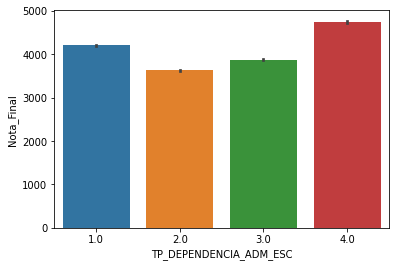

In [0]:
sns.barplot(x='TP_DEPENDENCIA_ADM_ESC', y='Nota_Final', data=base)

Apesar da média ser baixa podemos ver claramente que os candidatos que estudaram em escolas particulares(código 4) tiveram melhor desempenho que os outros, seguido dos candidatos que estudaram em escolas federais(código 1) e municipais(código 3).No enem de 2016 os candidatos que estudaram em colégios estaduais tiveram menor desempenho. 

Nossa segunda pergunta é:Os alunos que trabalham teriam menor desempenho no enem, visto que provavelmente teriam menos tempo para estudar?
nosso atributo que traz essa indicação é o Q026 com o seguinte código: 
'A' - nunca trabalhou. 'B' - Já trabalhou mas não trabalha mais.
'C' - está trabalhando atualmente.

In [0]:
base.groupby('Q026')['Nota_Final'].mean()

Q026
A    3914.482087
B    3913.324399
C    3885.850857
Name: Nota_Final, dtype: float64

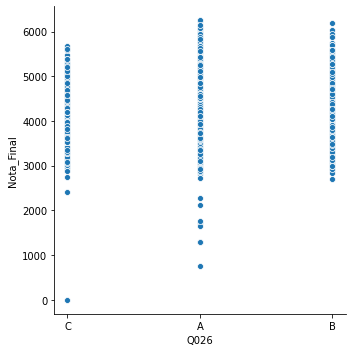

In [0]:
sns.relplot(x="Q026", y="Nota_Final", data=base);

O código A e B significa que o candidato não trabalha e percebemos que esses que não trabalham tiveram um desempenho ligeiramente maior do que os alunos que trabalham. Será que esse acréscimo na nota dos que não trabalham é reflexo do seu maior tempo livre para estudo? talve sim, pode ser um indicador.

Nossa terceira pergunta é: Quem está no terceiro ano do ensino médio se sai melhor no enem do que quem já concluiu o ensino médio?teoricamente os alunos do 3° ano estariam com a matéria mais fresca.

Para isso utilizamos nosso atributo TP_ST_CONCLUSAO que traz o seguinte código: 
1 - Já concluiu o ensino médio;
2 - Conclui o ensino médio em 2016;
3 - Conclui o ensino médio depois de 2016;
4 - Não concluiu e não cursa o ensino médio;

In [0]:
base.groupby('TP_ST_CONCLUSAO')['Nota_Final'].mean()

TP_ST_CONCLUSAO
1    3979.956637
2    3890.986494
3    3804.947615
4    3728.230531
Name: Nota_Final, dtype: float64

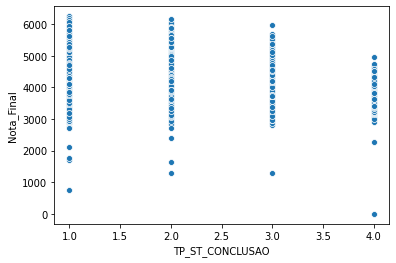

In [0]:
sns.scatterplot(x="TP_ST_CONCLUSAO", y="Nota_Final", data=base)

Pelo gráfico vemos que as notas de quem já concluiu o ensino médio, quem vai concluiur em 2016 e quem vai concluir depois são muito parecidas.Mostrando que quem está no 3° ano do ensino médio não teria tanta vantagem sobre quem não está. Agora quem não concluiu o ensino médio e não pensa em concluir tem um desempenho bem mais abaixo que os outros.

Para a nossa quarta pergunta temos:Qual a região do Brasil com maior média no enem?

Para isso vamos usar nosso atributo Região, que criamos especialmente para isso.

In [0]:
base.groupby('Região')['Nota_Final'].mean()

Região
Centro-Oeste    3916.966296
Nordeste        3794.278177
Norte           3788.096417
Sudeste         4061.788733
Sul             3966.938817
Name: Nota_Final, dtype: float64

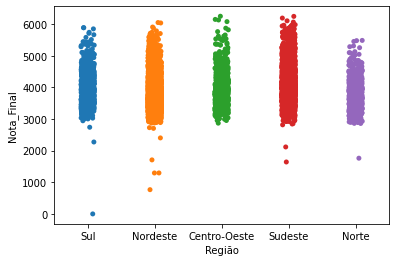

In [0]:
sns.stripplot(x="Região" , y="Nota_Final", data=base)

Pelo gráfico temos que as notas no enem por região são muito parecidas, o sudeste e o sul com uma nota um pouco maior e o norte com um pouco menor que os outros.

Por fim nossa última pergunta é: Será que os candidatos casados tiveram menor aproveitamento que os solteiros?teoricamente os casados tem maiores tarefas diárias e isso poderia limitar o tempo de estudo.
Nosso atributo é o TP_ESTADO_CIVIL e nosso código é:
 0: Solteiro, 1: Casado, 2: Divorciado, 3: Viúvo.

In [0]:
base.groupby('TP_ESTADO_CIVIL')['Nota_Final'].mean()

TP_ESTADO_CIVIL
0.0    3914.722831
1.0    3841.705538
2.0    3821.746468
3.0    3843.029135
Name: Nota_Final, dtype: float64

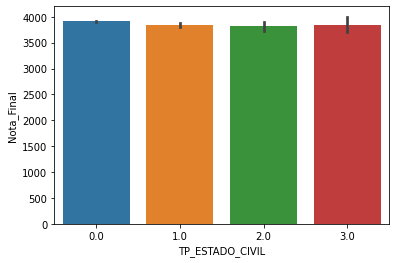

In [0]:
sns.barplot(x='TP_ESTADO_CIVIL', y='Nota_Final', data=base)

Mais uma vez o gráfico nega nossa hipótese. Os candidatos casados tiveram desempenho semelhante aos solteiros e isso evidencia que mesmo com afazeres cotiadianos da vida de um casal é possível estudar e se dedicar para uma   prova como o enem.

Bom, essa foram algumas perguntas que pudemos responder com o nosso dataset. Claro que poderiamos ter feito várias outras e analisado alguns outros aspectos e eu te convido a fazê-lo, se aventure e busque outras análises, é assim que a gente aprende.
Dito isso, podemos começar nosso 3° passo e treinar nosso modelo de predição das notas matemáticas.

# **3- Criação e treinamento do modelo**

Para criar nossos modelos vamos utilizar dois métodos de regressão que é o LinearRegression e o RandomForestRegressor ambos da biblioteca de sklearn do python. Depois vamos verificar na quarta parte, qual modelo se sai melhor.

Para isso primeiro vamos dividir a nossa base em dados de treino e dados de teste.Fazemos isso com a biblioteca train_test_split também do sklearn. Utilizaremos os dados de treino para treinar o nosso modelo e os dados de teste para avaliar a perfomance dele.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [0]:
X_train, X_teste, y_train, y_teste = train_test_split(base.drop('NU_NOTA_MT',axis=1), base['NU_NOTA_MT'], test_size=0.2, random_state=0)

O código acima divide nosso dataset em dados de treino e teste,sendo que os dados de treino tem 80% da nossa base e os dados de teste 20%

In [0]:
X_train.shape

(8077, 22)

In [0]:
X_teste.shape

(2020, 22)

In [0]:
base.shape

(10097, 23)

Para predizer a notas de matematica dos alunos vamos avaliar quais são os atributos que realmente se correlacionam a nota de matemática, assim garantimos a utilização apenas de variáveis importantes ao resultado, o que aumenta a taxa de acerto do nosso modelo.

In [0]:
base.corr()

,NU_IDADE,TP_ST_CONCLUSAO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO,TP_ESTADO_CIVIL,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota_Final
NU_IDADE,1.000000,-0.297220,-0.041580,NaN,NaN,NaN,NaN,-0.062208,-0.000076,-0.025205,-0.056657,-0.115139,0.556834,-0.101586,-0.113305,-0.103409,-0.110092,-0.085160,-0.055632
TP_ST_CONCLUSAO,-0.297220,1.000000,-0.045793,NaN,NaN,NaN,NaN,-0.087215,-0.141062,-0.116986,-0.111349,-0.119494,-0.083507,-0.104147,-0.109111,-0.113471,-0.116655,-0.089141,-0.132229
TP_DEPENDENCIA_ADM_ESC,-0.041580,-0.045793,1.000000,NaN,NaN,NaN,NaN,0.385577,0.294497,0.261796,0.366905,0.231255,-0.047607,0.176803,0.208866,0.218066,0.208091,0.206353,0.407195
TP_PRESENCA_CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_PRESENCA_CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_PRESENCA_LC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_PRESENCA_MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NU_NOTA_MT,-0.062208,-0.087215,0.385577,NaN,NaN,NaN,NaN,1.000000,0.529594,0.492031,0.584941,0.379891,-0.035551,0.299811,0.335441,0.350556,0.342629,0.343998,0.891956
NU_NOTA_CH,-0.000076,-0.141062,0.294497,NaN,NaN,NaN,NaN,0.529594,1.000000,0.692988,0.611573,0.550582,-0.002345,0.443809,0.488050,0.510452,0.488797,0.494798,0.815813
NU_NOTA_LC,-0.025205,-0.116986,0.261796,NaN,NaN,NaN,NaN,0.492031,0.692988,1.000000,0.545667,0.513982,-0.017708,0.431546,0.453135,0.475782,0.468100,0.443357,0.758599


Na tabela acima vemos o grau de correlação entre as variáveis e vamos utilizar para treinamento do nosso modelo apenas as variáveis que tiverem correlação maior ou igual a 0.50 ou seja uma correlção maior ou igual a 50%.
Por isso vamos utilizar a Nota_Final com uma correlação de 0.89, a NU_NOTA_CN com uma correlação de 0.59, a NU_NOTA_CH com uma correlção de 0.53 e por último a NU_NOTA_LC que tem uma correlação de 0.49(quase 50%).

In [0]:
X_train = X_train[['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','Nota_Final']]

In [0]:
X_train

,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH,Nota_Final
13351,529.2,494.3,442.0,3651.364286
10458,428.3,529.8,547.1,4011.700000
6724,387.7,487.1,475.4,3738.450000
2875,530.5,572.0,620.6,4834.771429
4973,395.3,454.5,517.3,3393.264286
...,...,...,...,...
12562,394.6,456.1,419.8,3261.992857
6601,410.3,501.1,651.0,4045.950000
4442,427.7,401.3,498.4,3595.135714
13387,416.4,472.1,571.1,3716.535714


Agora com os nosso dados de treino preparados, podemos criar e treinar nosso modelos.

Para usar o modelo LinearRegression(), precisamos que nossos dados estejam no formato de arrays. então vamos transformá-los.

In [0]:
X_train_array = X_train.values
y_train_array = y_train.values

In [0]:
modeloLinear = LinearRegression()

In [0]:
modeloLinear.fit(X_train_array, y_train_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Criamos agora nosso modelo do RandomForestRegressor

In [0]:
modeloRegressor = RandomForestRegressor(n_estimators=10, random_state=39, max_depth=4)

In [0]:
modeloRegressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=39, verbose=0, warm_start=False)

Com nosso modelo treinado podemos ir para a quarta e última parte que é a predição e avaliação dos nossos modelos.

# **4- Predição e Avaliação dos Modelos**

Vamos criar duas variáveis que vão armazenar as predições da nota de matemática dos nosssos modelos.Utilizando nossas variavéis de teste.

Para utilizar nossos dados de teste precisamos que elas tenham as mesmas colunas que os dados de treino

In [0]:
X_teste = X_teste[['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','Nota_Final']]

Com os nossos dados de teste prontos, podemos predizer as notas de matemática dos nossos dados de teste e avaliar a perfomance do modelo. Vamos começar com o modelo linear

In [0]:
predicaoLinear = modeloLinear.predict(X_teste)

Com a predição feita podemos avaliar a perfomance do nosso modelo com ajuda da lib metrics também do sklearn

In [0]:
from sklearn import metrics

EQMLin = metrics.mean_squared_error(y_teste, predicaoLinear).round(2)
REQMLin = np.sqrt(metrics.mean_squared_error(y_teste, predicaoLinear)).round(2)
R2Lin = metrics.r2_score(y_teste, predicaoLinear).round(2)

pd.DataFrame([EQMLin, REQMLin, R2Lin], ["EQMLin", "REQMLin", "R2Lin"], columns=["Métricas"])

,Métricas
EQMLin,136.32
REQMLin,11.68
R2Lin,0.99


O R2Lin representa para nós a perfomance do modelo que está em 99%. Uau!!! Muito alta! Claro que estamos num ambiente de treinamento e poderemos depois fazer outros teste para avaliar nosso modelo mais criticamente mas para uma primeira tentativa está muito bom.

Podemos avaliar a perfomance do modelo linear também com a ajuda de uma lib chamada yellowbrick. Para instalá-la usamos o comando !pip install yellowbrick

In [0]:
!pip install yellowbrick

In [0]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

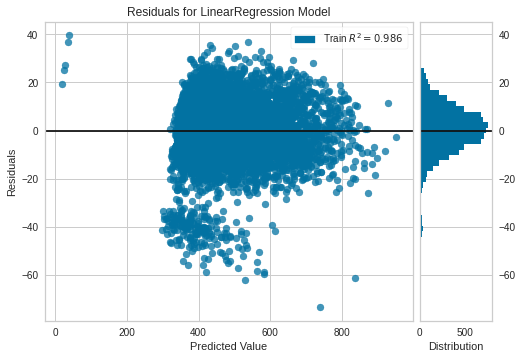

In [0]:
visualizador = ResidualsPlot(modeloLinear)
visualizador.fit(X_train, y_train)
visualizador.poof()

0.9863753159623664

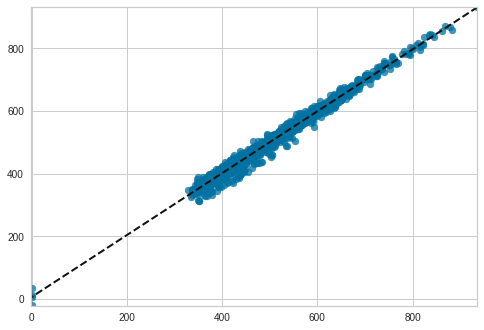

In [0]:
visualizador = PredictionError(modeloLinear)

visualizador.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizador.score(X_teste, y_teste)  # Evaluate the model on the test data

Esse é um outro modo de avaliar nosso modelo linear
Vamos agora usar o modelo do Random Forest Regressor

In [0]:
predicaoRegressor = modeloRegressor.predict(X_teste)

In [0]:

EQMReg = metrics.mean_squared_error(y_teste, predicaoLinear).round(2)
REQMReg = np.sqrt(metrics.mean_squared_error(y_teste, predicaoLinear)).round(2)
R2Reg = metrics.r2_score(y_teste, predicaoLinear).round(2)

pd.DataFrame([EQMReg, REQMReg, R2Reg], ["EQMReg", "REQMReg", "R2Reg"], columns=["Métricas"])

,Métricas
EQMReg,136.32
REQMReg,11.68
R2Reg,0.99


Nosso modelo com Random Forest também teve uma margem alta de acerto. Muito Muito Bom!!! 
Claro que precisaríamos de um ambiente de produção para verificar se nosso modelo está overfitted mas acho que essa análise já nos ajudou bastante.

Bom, cumprimos nosso objetivo de análisar os dados do enem respondendo algmas perguntas e construir um modelo para predizer as notas de matemática dos candidatos. Espero que ajude a quem precisar, até a próxima...!